<a href="https://colab.research.google.com/github/Valepowell/Proyecto1_ParteV_Core/blob/main/Proyecto_1_%E2%80%93_Parte_V_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instrucciones**

1. **Continuar desde la Parte IV**
- Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.

3. **Generar un Tag en GitHub y Realizar una Presentación**
- Generar un Tag en GitHub: Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub, genera un Pull Request (PR) para revisión y finalmente crea un tag para esta versión del proyecto.

Realizar una Presentación: Prepara una presentación en slides que resuma tu análisis y visualizaciones.
La presentación debe incluir:
- Introducción y objetivos del proyecto.
- Descripción del conjunto de datos.
- Principales análisis y hallazgos.
- Visualizaciones clave con explicación.
- Conclusiones y recomendaciones.

Utiliza herramientas como PowerPoint, Google Slides o cualquier otra aplicación de presentación.

In [ ]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importamos una bbdd en formato excel y lo guardamos en una variable.
path = "/content/drive/MyDrive/BBDD/ventas_limpio.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   store id               30000 non-null  object 
 1   product id             30000 non-null  int64  
 2   date                   30000 non-null  object 
 3   units sold             30000 non-null  int64  
 4   sales revenue (usd)    30000 non-null  float64
 5   discount percentage    30000 non-null  int64  
 6   marketing spend (usd)  30000 non-null  int64  
 7   store location         30000 non-null  object 
 8   product category       30000 non-null  object 
 9   day of the week        30000 non-null  object 
 10  holiday effect         30000 non-null  bool   
 11  valor  unit            29763 non-null  float64
 12  net revenue            30000 non-null  float64
 13  Categoria              30000 non-null  object 
 14  year_month             30000 non-null  object 
 15  re

2. **Exploración de Datos Avanzada**
- Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.


In [ ]:
df.dtypes

,0
store id,object
product id,int64
date,object
units sold,int64
sales revenue (usd),float64
discount percentage,int64
marketing spend (usd),int64
store location,object
product category,object
day of the week,object


In [ ]:
# Generación de la data de la correlación con las columnas númericas
data_col_numericas = [
    "units sold", "sales revenue (usd)", "discount percentage",
    "marketing spend (usd)", "valor  unit", "net revenue",
    "media_por_producto", "desviacion_vs_media"
]

In [ ]:
print(data_col_numericas)

['units sold', 'sales revenue (usd)', 'discount percentage', 'marketing spend (usd)', 'valor  unit', 'net revenue', 'media_por_producto', 'desviacion_vs_media']


In [ ]:
# Definición de la correlación con las columnas númericas
correlation_matrix = df[data_col_numericas].corr()
print(correlation_matrix)


                       units sold  sales revenue (usd)  discount percentage  \
units sold               1.000000             0.615767            -0.001620   
sales revenue (usd)      0.615767             1.000000            -0.065791   
discount percentage     -0.001620            -0.065791             1.000000   
marketing spend (usd)   -0.004750            -0.002732            -0.000322   
valor  unit              0.042151             0.723408            -0.095281   
net revenue              0.609264             0.996880            -0.122607   
media_por_producto       0.067196             0.722406             0.000414   
desviacion_vs_media      0.820317             0.691469            -0.095578   

                       marketing spend (usd)  valor  unit  net revenue  \
units sold                         -0.004750     0.042151     0.609264   
sales revenue (usd)                -0.002732     0.723408     0.996880   
discount percentage                -0.000322    -0.095281    -0.12

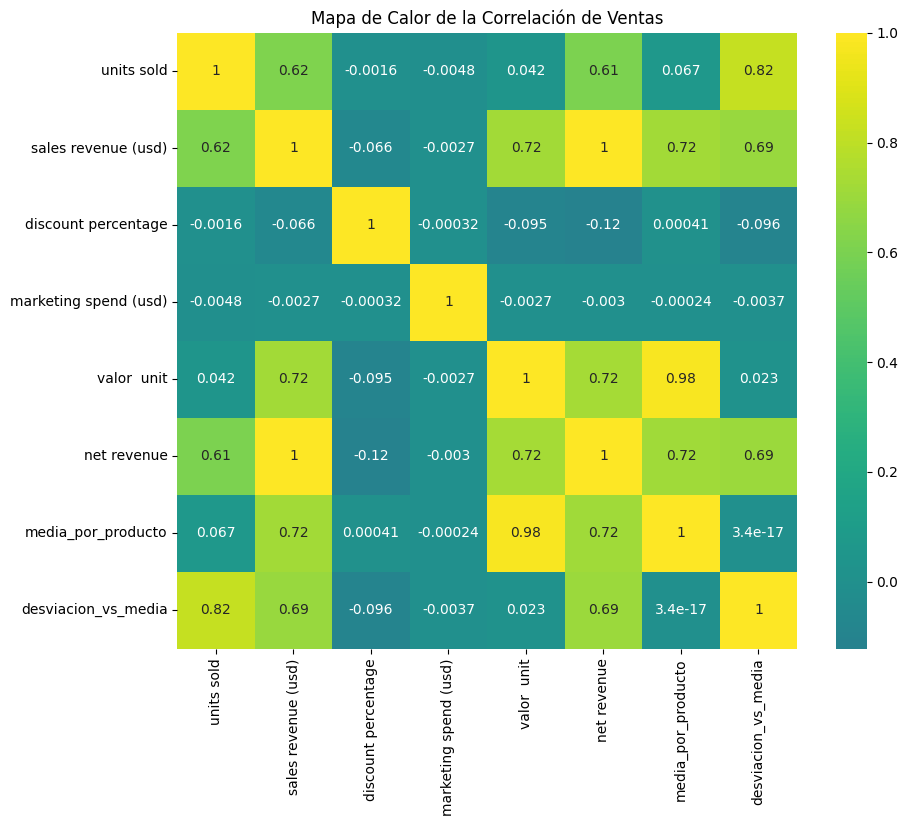

In [ ]:
# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Ventas")
plt.show()



- Crea subplots para comparar diferentes variables clave.
- Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

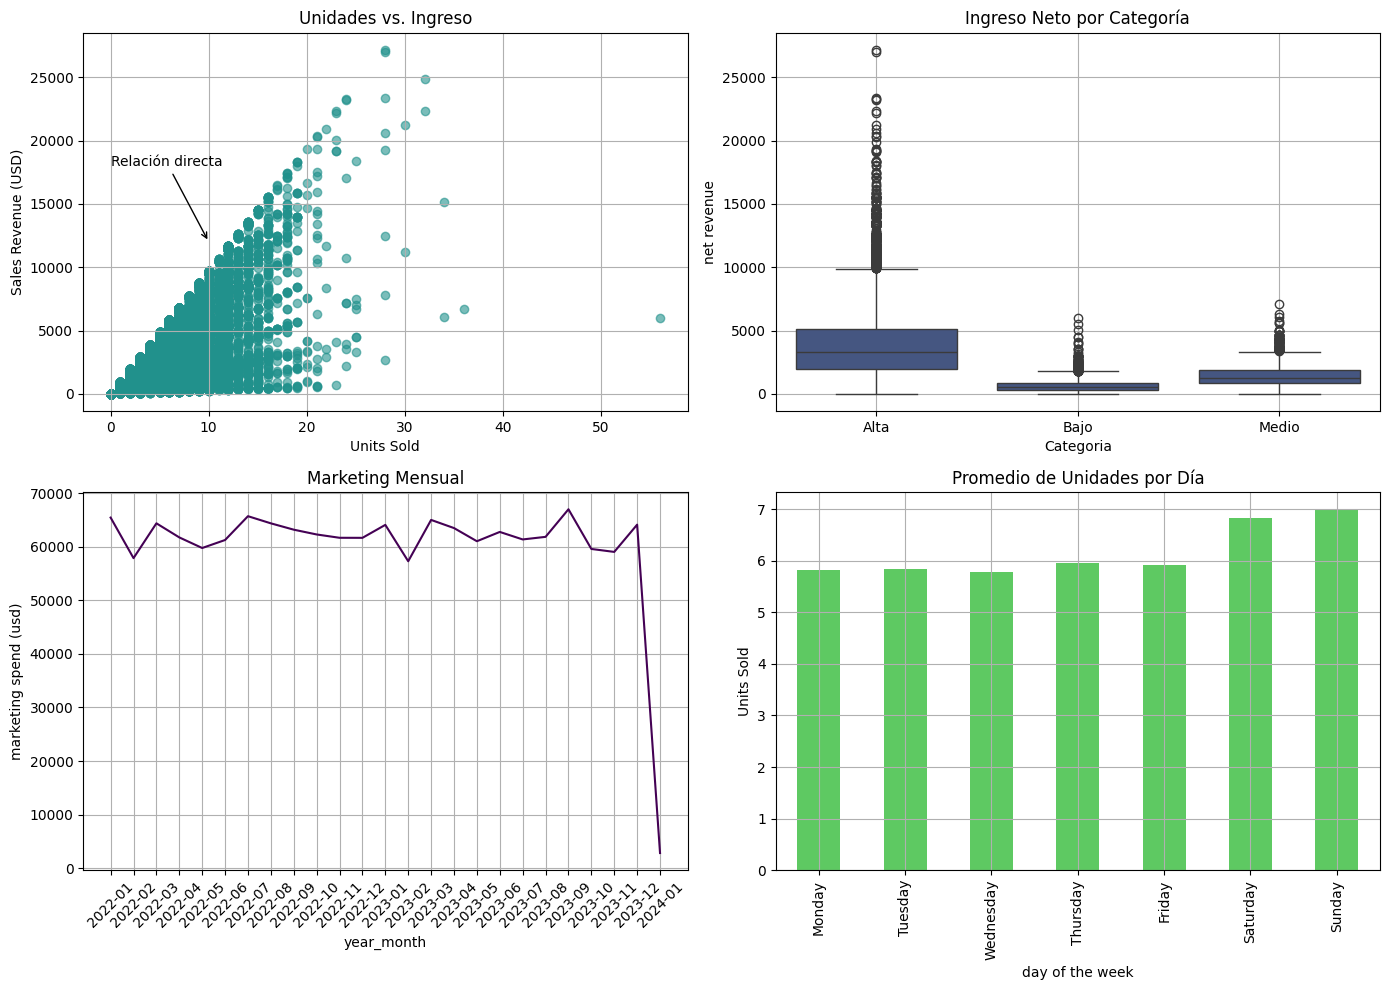

In [ ]:
# Definicón de estructura
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Colores estilo "viridis"
colors = ['#440154', '#3b528b', '#21918c', '#5ec962']

# Gráfico de Dispensión: Unidades vendidas vs. Ingreso por ventas
axs[0, 0].scatter(df["units sold"], df["sales revenue (usd)"], alpha=0.6, color=colors[2])
axs[0, 0].set_title("Unidades vs. Ingreso")
axs[0, 0].set_xlabel("Units Sold")
axs[0, 0].set_ylabel("Sales Revenue (USD)")
axs[0, 0].grid(True)
axs[0, 0].annotate('Relación directa', xy=(10, 12000), xytext=(0, 18000),
                   arrowprops=dict(facecolor='black', arrowstyle="->"))

# Gráfico de Cajas: Ingreso neto por categoría
sns.boxplot(x="Categoria", y="net revenue", data=df, ax=axs[0, 1], color=colors[1])
axs[0, 1].set_title("Ingreso Neto por Categoría")
axs[0, 1].grid(True)

# Gráfico de Lineas: Gasto en marketing por mes
df_grouped = df.groupby("year_month")["marketing spend (usd)"].sum().reset_index()
sns.lineplot(data=df_grouped, x="year_month", y="marketing spend (usd)", ax=axs[1, 0], color=colors[0])
axs[1, 0].set_title("Marketing Mensual")
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Gráfico de Barras: Promedio de unidades vendidas por día
day_avg = df.groupby("day of the week")["units sold"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
day_avg.plot(kind="bar", ax=axs[1, 1], color=colors[3])
axs[1, 1].set_title("Promedio de Unidades por Día")
axs[1, 1].set_ylabel("Units Sold")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()